In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

# Load dataset

In [35]:
df = pd.read_csv('./data/labeled/youtube_labeled.csv', usecols=['text', 'emotion'])

df

,text,emotion
0,"New YouTube idea : Logan, Mike and David switc...",neutral/other
1,"You can tell he matured and changed so much, s...",positive
2,"Ok,I’m sorry Logan,I’ve been thinking,and I ca...",positive
3,After watching him now I feel like he did not ...,positive
4,Literally 99% won’t see this but have a wonder...,positive
...,...,...
830,Mike getting pissed at a joke but would make t...,negative
831,Holy shit this is horrendous..,negative
832,Holy shit. I knew it was bad when I watched it...,negative
833,was horrifying to watch 😂,negative


# Preprocessing

## Handle Duplicates

In [36]:
df.duplicated(subset=['text'], keep='first').sum()

46

In [37]:
# Drop duplicates
df.drop_duplicates(subset=['text'], keep='first', inplace=True)

df.duplicated(subset=['text'], keep='first').sum()

0

# Emotions

The categories that will be used for the emotions:
* Neutral/other
* Negative (anger/hate/disgust)
* Positive (joy/happiness/amusement/love)
* Constructive feedback/idea
* Sadness

<br>

What needs to be done:
* check what emotions are in the dataframe
* count the number of examples for each emotion

In [38]:
df['emotion'].unique()

array(['neutral/other', 'positive', 'constructive feedback/idea',
       'sadness', 'negative'], dtype=object)

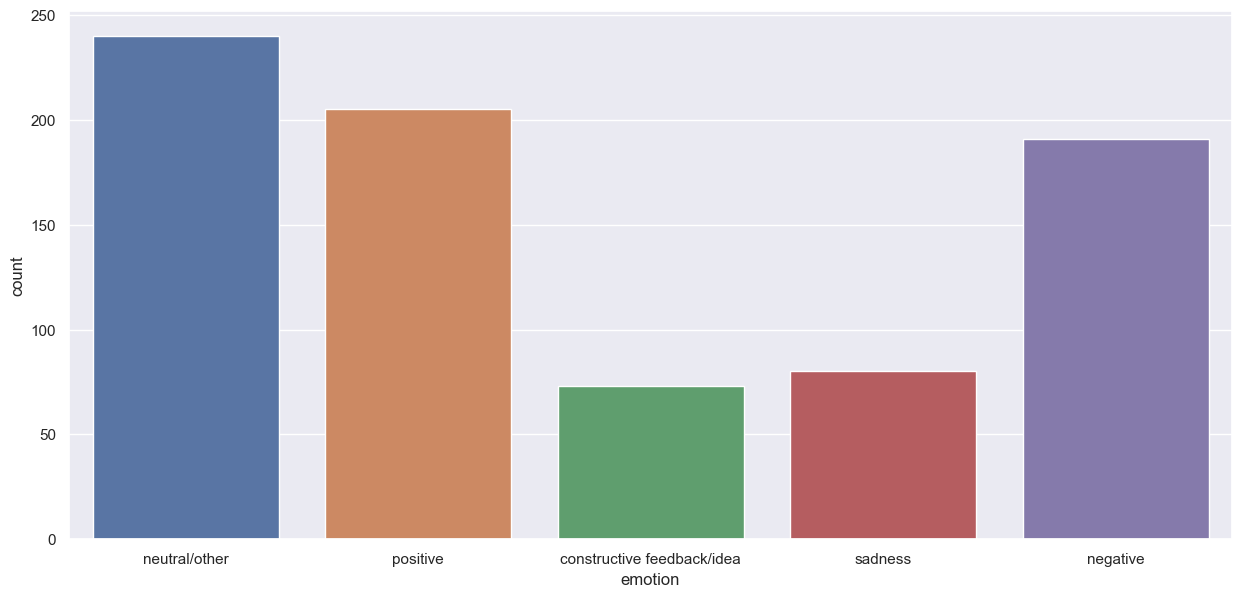

In [39]:
plt.figure(figsize=(15, 7), dpi=100)
sns.countplot(x='emotion', data=df)
plt.show()

In [40]:
df.groupby('emotion').count()

,text
emotion,
constructive feedback/idea,73
negative,191
neutral/other,240
positive,205
sadness,80


## Save Edited Dataset

In [41]:
df.to_csv('./data/labeled/youtube_labeled_edited.csv', columns=['text', 'emotion'])